In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle as pkl
import numpy as np
from scipy import stats
import sys
sys.path.insert(1, '../')
from encoding import prefix_bin
import os
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D

In [16]:
def get_retraining_point(dataset, classifier, prefix):
    training_data = '../result/%s/%s/Finished cases/train_rebalance_%s prefix_%s training window retrained.pkl'%(dataset, classifier, True, prefix)

    with open(training_data, 'rb') as openfile:
        training_data = pkl.load(openfile)
    updated_train_index = list(training_data.keys())[-1]
    return updated_train_index-200

In [26]:
def plotting_corr_graph(plot, dataset, prefix, classifier, retraining=False):
    performance = pd.read_csv('../result/%s/%s/performance/rebalanced_True prefix_%s performance.csv'%(dataset, classifier, prefix))
    label =pd.read_csv('../result/%s/%s/rebalanced_True label.csv'%(dataset, classifier))
    variant =pd.read_csv('../result/%s/%s/rebalanced_True variant.csv'%(dataset, classifier))

    if retraining == True:
        performance = pd.read_csv('../result/%s/%s/performance/rebalanced_True prefix_%s performance retrained.csv'%(dataset, classifier, prefix))
        label =pd.read_csv('../result/%s/%s/rebalanced_True label retrained.csv'%(dataset, classifier))
        variant =pd.read_csv('../result/%s/%s/rebalanced_True variant retrained.csv'%(dataset, classifier))

    ax2 = plot.twinx()

    stackplot_labels = ['Variant coverage', 'Label distribution']

    if dataset == 'bpic17':
        stackplot_labels = ['Variant coverage', 'Label distribution', 'Event attrs coverage']
        event_attrs =pd.read_csv('../result/%s/%s/rebalanced_True event_attrs.csv'%(dataset, classifier))
        plot.stackplot(range(len(variant)), variant.loc[:,str(prefix)], label.loc[:,str(prefix)], event_attrs.loc[:,str(prefix)], labels = stackplot_labels)
    else:
        plot.stackplot(range(len(variant)), variant.loc[:,str(prefix)], label.loc[:,str(prefix)])
    ax2.plot(range(len(variant)), performance['fscore'], 'black')

    # fig.legend(loc="center", bbox_to_anchor=(0.5,-0.18), ncols = 3, bbox_transform=ax1.transAxes, fontsize = 18)

    if dataset != 'bpic17':
        plot.set_ylim(0,2)
    else:
        plot.set_ylim(0,3)
    ax2.set_ylim(0,1)
    plot.set_xlabel('Newly arrived traces',fontsize = 25)
    plot.set_ylabel('Coverage & Distribution', fontsize = 25)
    ax2.set_ylabel('Performance',  fontsize = 25)
    plt.title('(a) %s %s Prefix %s'%(dataset, classifier.upper(), prefix), fontsize = 25)

    # plt.title('(a) Train once', fontsize = 20)
    plt.tight_layout()
    return plot, ax2

0    0.166667
1    0.166667
2    0.166667
3    0.166667
4    0.166667
5    0.200000
6    0.200000
7    0.200000
8    0.166667
9    0.166667
Name: 1, dtype: float64
0    0.166667
1    0.166667
2    0.166667
3    0.166667
4    0.166667
5    0.200000
6    0.200000
7    0.200000
8    0.166667
9    0.166667
Name: 4, dtype: float64
0    0.166667
1    0.166667
2    0.166667
3    0.166667
4    0.166667
5    0.200000
6    0.200000
7    0.200000
8    0.166667
9    0.166667
Name: 5, dtype: float64


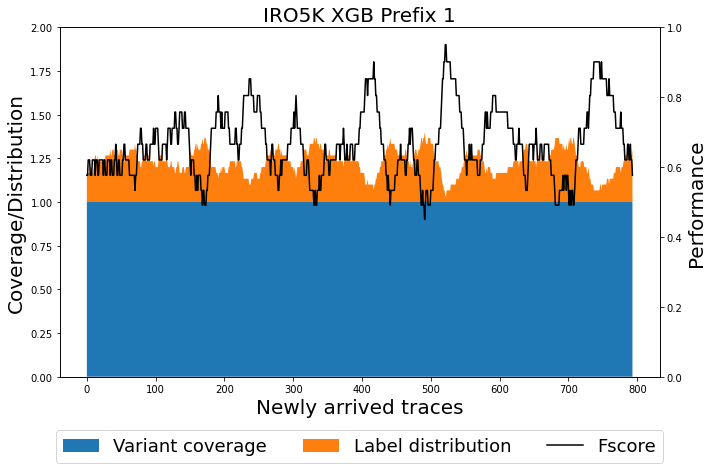

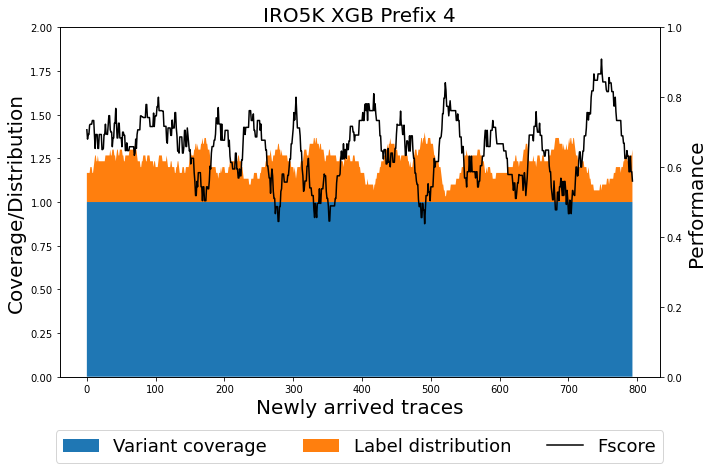

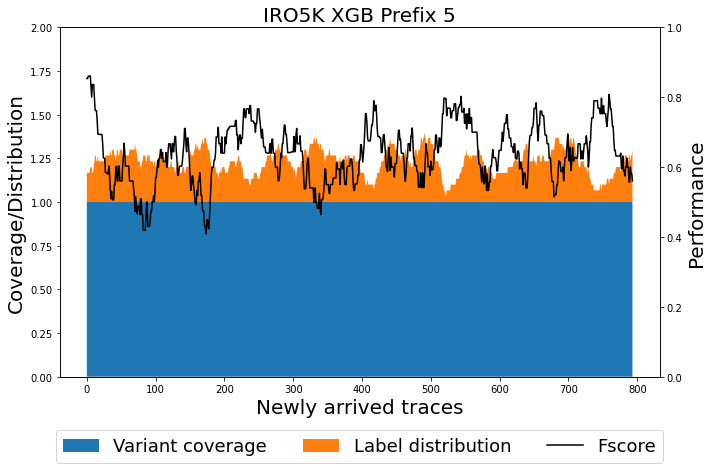

In [32]:
for prefix in [1,4,5]:
    plt.rcParams["figure.figsize"] = (10,6)
    dataset = 'IRO5K'
    classifier = 'xgb'
    performance = '../result/%s/%s/performance/rebalanced_True prefix_%s performance.csv'%(dataset, classifier, prefix)
    performance = pd.read_csv(performance)

    label =pd.read_csv('../result/%s/%s/rebalanced_True label.csv'%(dataset, classifier))
    variant =pd.read_csv('../result/%s/%s/rebalanced_True variant.csv'%(dataset, classifier))
    if dataset == 'bpic17':
        event_attrs =pd.read_csv('../result/%s/%s/rebalanced_True event_attrs.csv'%(dataset, classifier))

    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    stackplot_labels = ['Variant coverage', 'Label distribution', 'Event attrs coverage']
    if dataset == 'bpic17':
        print(max(variant.loc[:,str(prefix)]), min(variant.loc[:,str(prefix)]), np.average(variant.loc[:,str(prefix)]))
        stackplot_labels = ['Variant coverage', 'Label distribution', 'Event attrs coverage']
        ax1.stackplot(range(len(variant)), variant.loc[:,str(prefix)], label.loc[:,str(prefix)], event_attrs.loc[:,str(prefix)], labels = stackplot_labels)
        # ax1.axhline(y=0.7, color='r', linestyle='-')

    else:
        stackplot_labels = ['Variant coverage', 'Label distribution']
        ax1.stackplot(range(len(variant)), variant.loc[:,str(prefix)], label.loc[:,str(prefix)], labels = stackplot_labels)        
    ax2.plot(range(len(variant)), performance['fscore'], 'black', label = 'Fscore')

    fig.legend(loc="center", bbox_to_anchor=(0.5,-0.2), ncols = 3, bbox_transform=ax1.transAxes, fontsize = 18)
    
    if dataset != 'bpic17':
        ax1.set_ylim(0,2)
    else:
        ax1.set_ylim(0,3)
    ax2.set_ylim(0,1)
    ax1.set_xlabel('Newly arrived traces',fontsize = 20)
    ax1.set_ylabel('Coverage/Distribution', fontsize = 20)
    ax2.set_ylabel('Performance',  fontsize = 20)
    plt.title('%s %s Prefix %s'%(dataset, classifier.upper(), prefix), fontsize = 20)
    plt.tight_layout()
    
    try:
        os.makedirs('../img/%s/%s/'%(dataset, classifier))
    except:
        pass
    print(label.loc[:,str(prefix)][:10])
    # plt.show()
    plt.savefig('../img/%s/%s/Prefix %s result.png'%(dataset, classifier, prefix), bbox_inches='tight')

In [12]:
label =pd.read_csv('../result/%s/%s/rebalanced_True label.csv'%(dataset, classifier))
for pos, i in enumerate(label.loc[:, str(3)]):
    if i <=0.1 or i >=0.9:
        print(pos, i)
        

236 0.1
237 0.1
238 0.1
405 0.1
406 0.1
407 0.1
409 0.1
410 0.1
411 0.1
412 0.1
413 0.1
414 0.1
415 0.1
416 0.1
417 0.0666666666666666
418 0.1
419 0.1
517 0.1
518 0.1
519 0.0666666666666666
520 0.0666666666666666
521 0.0333333333333333
522 0.0333333333333333
523 0.0666666666666666
524 0.0666666666666666
525 0.0666666666666666
526 0.0666666666666666
527 0.0666666666666666
528 0.0666666666666666
529 0.1
530 0.1
531 0.1
532 0.1
533 0.1
534 0.1
535 0.1
536 0.1
733 0.1
734 0.1
735 0.1
736 0.1
737 0.0666666666666666
738 0.0666666666666666
739 0.0666666666666666
740 0.0666666666666666
741 0.0666666666666666
742 0.0666666666666666
743 0.0666666666666666
744 0.0666666666666666
745 0.0666666666666666
746 0.1
747 0.1
748 0.0666666666666666
749 0.1
750 0.1
751 0.1
752 0.1
753 0.1
754 0.1
755 0.1
759 0.1


In [35]:
def get_retraining_point(dataset, classifier, prefix):
    training_data = '../result/%s/%s/Finished cases/train_rebalance_%s prefix_%s training window label retrained.pkl'%(dataset, classifier, True, prefix)

    with open(training_data, 'rb') as openfile:
        training_data = pkl.load(openfile)
    updated_train_index = list(training_data.keys())[-1]
    return updated_train_index

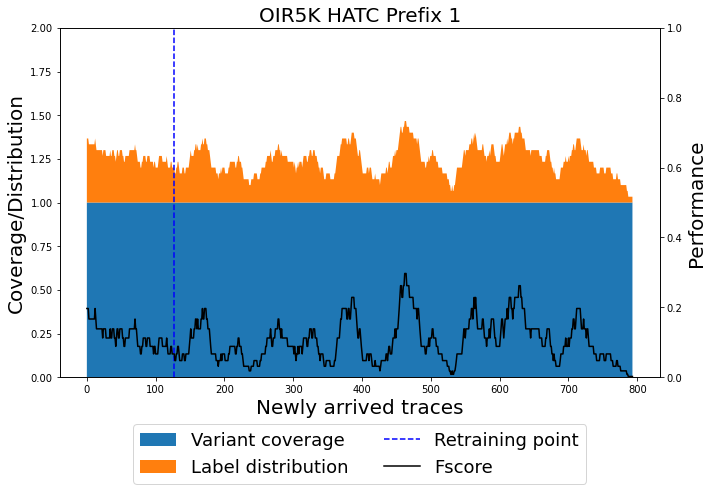

In [83]:
for prefix in [1]:
    plt.rcParams["figure.figsize"] = (10,6)
    dataset = 'OIR5K'
    classifier = 'hatc'
    performance = '../result/%s/%s/performance/rebalanced_True prefix_%s performance label retrained.csv'%(dataset, classifier, prefix)
    performance = pd.read_csv(performance)

    label =pd.read_csv('../result/%s/%s/rebalanced_True label label retrained.csv'%(dataset, classifier))
    variant =pd.read_csv('../result/%s/%s/rebalanced_True variant label retrained.csv'%(dataset, classifier))
    if dataset == 'bpic17':
        event_attrs =pd.read_csv('../result/%s/%s/rebalanced_True event_attrs.csv'%(dataset, classifier))

    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    stackplot_labels = ['Variant coverage', 'Label distribution', 'Event attrs coverage']
    if dataset == 'bpic17':
        print(np.average(performance['fscore']))
        stackplot_labels = ['Variant coverage', 'Label distribution', 'Event attrs coverage']
        ax1.stackplot(range(len(variant)), variant.loc[:,str(prefix)], label.loc[:,str(prefix)], event_attrs.loc[:,str(prefix)], labels = stackplot_labels)
        # ax1.axhline(y=0.7, color='r', linestyle='-')

    else:
        stackplot_labels = ['Variant coverage', 'Label distribution']
        ax1.stackplot(range(len(variant)), variant.loc[:,str(prefix)], label.loc[:,str(prefix)], labels = stackplot_labels)        
    ax2.plot(range(len(variant)), performance['fscore'], 'black', label = 'Fscore')

    ax1.axvline(126, linestyle='--',color = 'b', label = 'Retraining point')
    fig.legend(loc="center", bbox_to_anchor=(0.5,-0.22), ncols = 2, bbox_transform=ax1.transAxes, fontsize = 18)
    
    if dataset != 'bpic17':
        ax1.set_ylim(0,2)
    else:
        ax1.set_ylim(0,3)
    ax2.set_ylim(0,1)
    ax1.set_xlabel('Newly arrived traces',fontsize = 20)
    ax1.set_ylabel('Coverage/Distribution', fontsize = 20)
    ax2.set_ylabel('Performance', fontsize = 20)
    plt.title('%s %s Prefix %s'%(dataset, classifier.upper(), prefix), fontsize = 20)
    plt.tight_layout()
    
    try:
        os.makedirs('../img/%s/%s/'%(dataset, classifier))
    except:
        pass
#     plt.show()
    plt.savefig('../img/%s/%s/Prefix %s result label retrained.png'%(dataset, classifier, prefix), bbox_inches='tight')
    



In [9]:
label#.loc[:,str(prefix)]

,12
0,0.466667
1,0.466667
2,0.466667
3,0.466667
4,0.466667
...,...
789,0.400000
790,0.400000
791,0.433333
792,0.433333


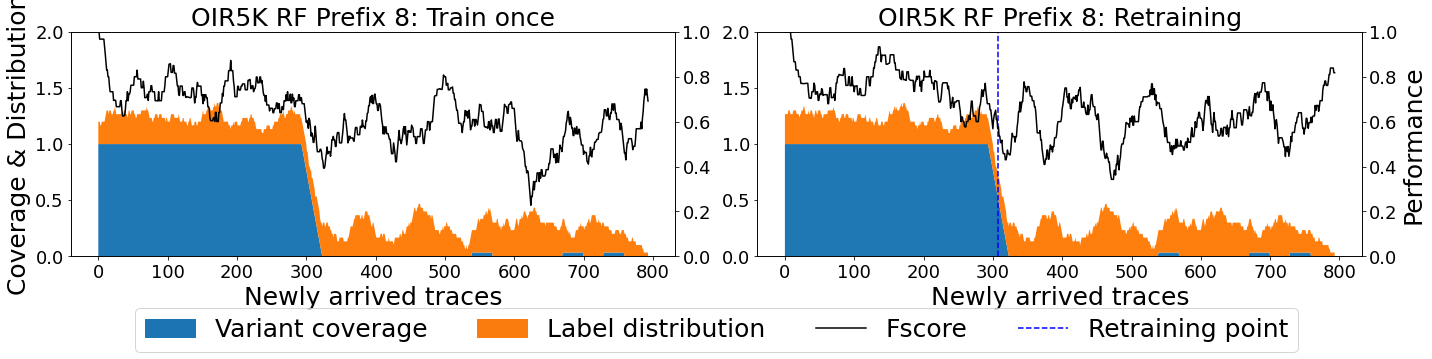

In [20]:
def plotting_corr_graph(plot, dataset, prefix, classifier, retraining=False):
    performance = pd.read_csv('../result/%s/%s/performance/rebalanced_True prefix_%s performance.csv'%(dataset, classifier, prefix))
    label =pd.read_csv('../result/%s/%s/rebalanced_True label.csv'%(dataset, classifier))
    variant =pd.read_csv('../result/%s/%s/rebalanced_True variant.csv'%(dataset, classifier))

    if retraining == True:
        performance = pd.read_csv('../result/%s/%s/performance/rebalanced_True prefix_%s performance retrained.csv'%(dataset, classifier, prefix))
        label =pd.read_csv('../result/%s/%s/rebalanced_True label retrained.csv'%(dataset, classifier))
        variant =pd.read_csv('../result/%s/%s/rebalanced_True variant.csv'%(dataset, classifier))

    ax2 = plot.twinx()

    stackplot_labels = ['Variant coverage', 'Label distribution']

    if dataset == 'bpic17':
        stackplot_labels = ['Variant coverage', 'Label distribution', 'Event attrs coverage']
        event_attrs =pd.read_csv('../result/%s/%s/rebalanced_True event_attrs.csv'%(dataset, classifier))
        plot.stackplot(range(len(variant)), variant.loc[:,str(prefix)], label.loc[:,str(prefix)], event_attrs.loc[:,str(prefix)], labels = stackplot_labels)
    else:
        plot.stackplot(range(len(variant)), variant.loc[:,str(prefix)], label.loc[:,str(prefix)])
    ax2.plot(range(len(variant)), performance['fscore'], 'black')

    # fig.legend(loc="center", bbox_to_anchor=(0.5,-0.18), ncols = 3, bbox_transform=ax1.transAxes, fontsize = 18)

    if dataset != 'bpic17':
        plot.set_ylim(0,2)
    else:
        plot.set_ylim(0,3)
    ax2.set_ylim(0,1)
    plot.set_xlabel('Newly arrived traces',fontsize = 25)
    plt.title('(a) %s %s Prefix %s'%(dataset, classifier.upper(), prefix), fontsize = 25)
    plot.xaxis.set_tick_params(labelsize=18)
    plot.yaxis.set_tick_params(labelsize=18)
    ax2.tick_params(labelsize = 18)

    plt.tight_layout()

    return plot,ax2

#OIR5K RF prefix 8 for low corr
#IRO5K XGB prefix 12 for high corr
plt.rcParams["figure.figsize"] = (20,4.5)
fig, axs = plt.subplots(1,2)
stackplot_labels = ['Variant coverage', 'Label distribution', 'Event attrs coverage']
count = 0
graph1 = axs[0]
graph2 = axs[1]
dataset = 'OIR5K'
classifier = 'rf'
prefix = 8
graph1,_ = plotting_corr_graph(graph1, dataset, prefix, classifier)
# plt.title('(a) %s %s Prefix %s'%('OIR5K', classifier.upper(), prefix), fontsize = 25)

dataset_title = dataset
if dataset == 'bpic17':
    dataset_title = 'BPIC 2017'
    
plt.title('%s %s Prefix %s: Train once'%(dataset_title, classifier.upper(), prefix), fontsize = 25)
graph1.set_ylabel('Coverage & Distribution', fontsize = 25)

graph2,_ = plotting_corr_graph(graph2, dataset, prefix, classifier, retraining=True)
# plt.title('(b) %s %s Prefix %s'%('OIR5K', classifier.upper(), prefix), fontsize = 25)
plt.title('%s %s Prefix %s: Retraining'%(dataset_title, classifier.upper(), prefix), fontsize = 25)
_.set_ylabel('Performance', fontsize=25)

label_dist = mpatches.Patch(color='#fa7c0e', label='Label distribution')
variant_cov = mpatches.Patch(color='#1c74b3', label='Variant coverage')
fscore_line = Line2D([0], [0], color='k', label='Fscore')
retraining_line = Line2D([0], [0], linestyle='--',color = 'b', label='Retraining point')
graph2.axvline(get_retraining_point(dataset, classifier, prefix), linestyle='--',color = 'b', label = 'Retraining point')
legends = [variant_cov, label_dist, fscore_line, retraining_line]

fig.legend(handles=legends, loc="center", bbox_to_anchor=(0.5,-0.03), ncols = 4, fontsize = 25)

plt.tight_layout()
# plt.show()
plt.savefig('../img/result correlation comparison low variant.pdf', dpi=500, bbox_inches='tight')

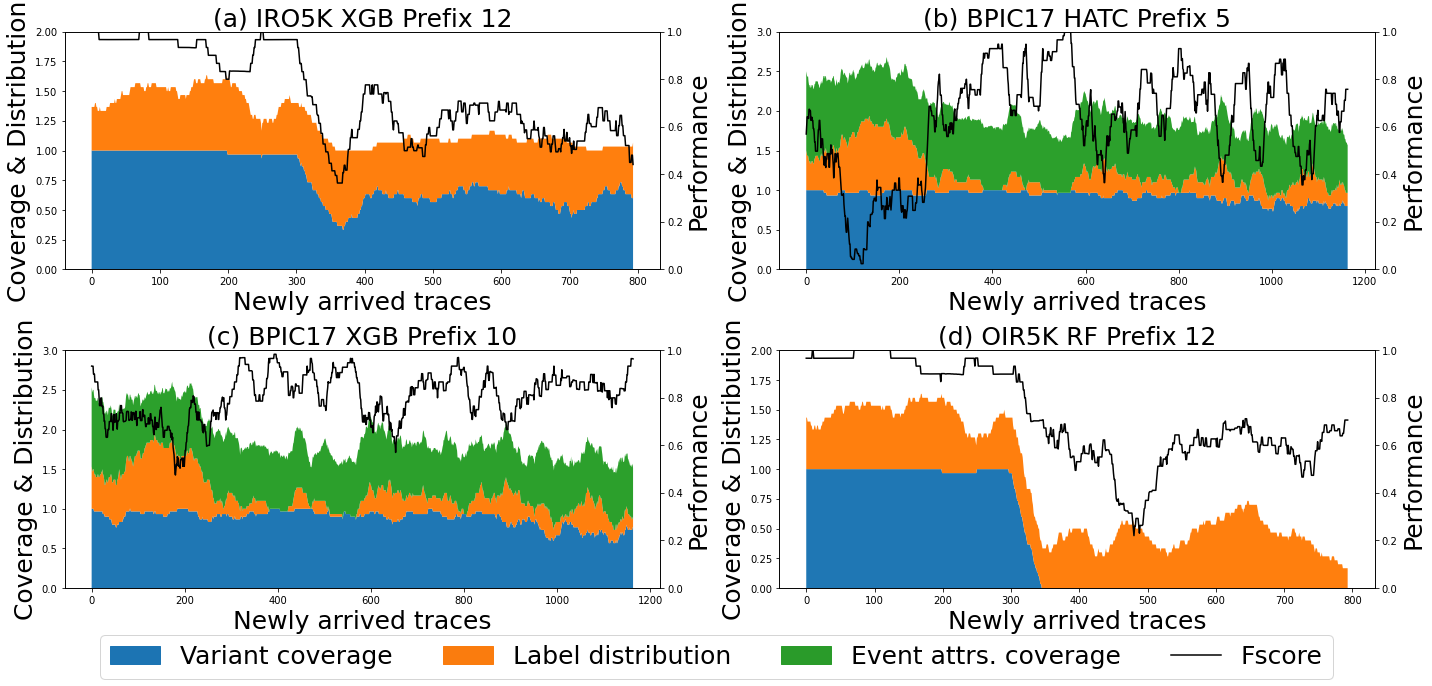

In [44]:
plt.rcParams["figure.figsize"] = (20,9)
prefix = 12
fig, axs = plt.subplots(2,2)
stackplot_labels = ['Variant coverage', 'Label distribution', 'Event attrs coverage']
count = 0
graph1 = axs[0][0]
graph2 = axs[0][1]
graph3 = axs[1][0]
graph4 = axs[1][1]
ax1, ax2 = plotting_corr_graph(graph1, 'IRO5K', 12, 'xgb')
plt.title('(a) %s %s Prefix %s'%('IRO5K', 'xgb'.upper(), 12), fontsize = 25)
ax1.set_ylabel('Coverage & Distribution')
ax2.set_ylabel('Performance')

ax1, ax2 = plotting_corr_graph(graph2, 'bpic17', 5, 'hatc')
plt.title('(b) %s %s Prefix %s'%('BPIC17', 'hatc'.upper(), 5), fontsize = 25)
ax1.set_ylabel('Coverage & Distribution')
ax2.set_ylabel('Performance')

ax1, ax2 = plotting_corr_graph(graph3, 'bpic17', 10, 'xgb')
plt.title('(c) %s %s Prefix %s'%('BPIC17', 'xgb'.upper(), 10), fontsize = 25)
ax1.set_ylabel('Coverage & Distribution')
ax2.set_ylabel('Performance')

ax1, ax2 = plotting_corr_graph(graph4, 'OIR5K', 12, 'rf')
plt.title('(d) %s %s Prefix %s'%('OIR5K', 'rf'.upper(), 12), fontsize = 25)
ax1.set_ylabel('Coverage & Distribution')
ax2.set_ylabel('Performance')


label_dist = mpatches.Patch(color='#fa7c0e', label='Label distribution')
variant_cov = mpatches.Patch(color='#1c74b3', label='Variant coverage')
event_attrs = mpatches.Patch(color='#2a9b2a', label='Event attrs. coverage')
fscore_line = Line2D([0], [0], color='k', label='Fscore')

fig.legend(handles=legends, loc="center", bbox_to_anchor=(0.5,-0.02), ncols = 4, fontsize = 25)

plt.tight_layout()
# plt.show()
plt.savefig('../img/result correlation comparison.png', dpi=500, bbox_inches='tight')